# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from pyproj import Transformer

# Feste Variablen

In [2]:
DATA_PATH = "../data/baumbestand_berlin.parquet"
OUTPUT_DATA_PATH = "../data/clean_baumbestand_berlin.parquet"

# Datenbeschreibung

| Feldname | Techn. Feldbezeichner (WFS) | Datentyp | Beispielwerte | Zusätzliche Erläuterung |
| :--- | :--- | :--- | :--- | :--- |
| **Technischer Schlüssel** | `baumid` | Text | 00008100:00150f98 | Berlin-weit eindeutige Baum/Standortnummer  |
| **GISID (Geoinformationssystem ID)** | `gisid` | Text | 00008100_000bbafb | Dies ist die Identifikationsnummer für die geometrische Repräsentation (den Punkt auf der Karte). |
| **PITID (PIT-Kommunal ID)** | `pitid` | Text | 00008100_000bbafb | Dies ist die interne Primärschlüssel-ID aus der Fachdatenbank-Software PIT-Kommunal. |
| **Baum Nr.** | `standortnr` | Text | 40/1-20; 75 | Bezirkl. Baum-/Standortnummer (nicht eindeutig) - nur für Straßenbäume  |
| **Objektnummer** | `kennzeich` | Text | 191410; 253500 | Bezirkliche Nummer des Pflegeobjektes dem der Baum zugeordnet ist  |
| **Objektname** | `namenr` | Text | Schiffbauerdamm; Spreebogenpark | Bezirklicher Name des Pflegeobjektes dem der Baum zugeordnet ist  |
| **Baumart (Deutsch)** | `art_dtsch` | Text | Gewöhnliche Esche; Sommer-Eiche |  |
| **Baumart (Botanisch)** | `art_bot` | Text | Fraxinus excelsior; Quercus robur |  |
| **Gattung (Deutsch)** | `gattung_deutsch` | Text | ESCHE; EICHE |  |
| **Gattung (Botanisch)** | `gattung` | Text | FRAXINUS; QUERCUS |  |
| **Baumartgruppe** | `art_gruppe` | Text | Laubbäume | Zuordnung zu einer Baumartgruppe. Mögliche Werte: Nadelbäume, Laubbäume, Obstbäume, Großsträucher  |
| **Straße** | `strname` | Text | Schiffbauerdamm | Nur bei Straßenbäumen  |
| **Hausnummer** | `hausnr` | Text | 40 | Nur bei Straßenbäumen  |
| **Hausnummer Zusatz** | `zusatz` | Text | - | Nur bei Straßenbäumen  |
| **Pflanzjahr** | `pflanzjahr` | Text | 2005; 1960 |  |
| **Standalter** | `standalter` | Zahl (Double) | 16; 61 | Standalter in Jahren  |
| **Krone Durchmesser** | `kronedurch` | Zahl (Double) | 3 | Angabe in m  |
| **Stamm Umfang** | `stammumfg` | Zahl (Integer) | 48; 133 | Angabe in cm  |
| **Baumhöhe** | `baumhoehe` | Zahl (Integer) | 6,5; 10 | Angabe in m  |
| **Bezirk** | `bezirk` | Text | Mitte |  |
| **Eigentümer** | `eigentuemer` | Text | Land Berlin |  |
| **Längengrad** | `longitude` | Zahl (Double) | 394532.25579996 | Koordinate im Referenzsystem (meist EPSG:25833 / UTM) |
| **Breitengrad** | `latitude` | Zahl (Double) | 5811460.99109967 | Koordinate im Referenzsystem (meist EPSG:25833 / UTM) |
| **Datenquelle / Layer** | `source_layer` | Text | baumbestand:strassenbaeume | Unterscheidung zwischen Straßenbäumen und Anlagenbäumen |

In [3]:
df = pd.read_parquet(DATA_PATH)
df.head()

,gisid,pitid,standortnr,kennzeich,namenr,art_dtsch,art_bot,gattung_deutsch,gattung,art_gruppe,...,pflanzjahr,standalter,kronedurch,stammumfg,baumhoehe,eigentuemer,bezirk,longitude,latitude,source_layer
0,00008100_000bbafb,00008100:000bbafb,93,01414,Fritz-Reuter-Allee,Pyramiden-Hainbuche,Carpinus betulus 'Fastigiata',HAINBUCHE,CARPINUS,Laubbäume,...,1975,50.0,NaN,109.0,15.0,Land Berlin,Neukölln,394532.2558,5.811461e+06,baumbestand:strassenbaeume
1,00008100_000bbafd,00008100:000bbafd,91,01414,Fritz-Reuter-Allee,"Berg-Ahorn, Weiss-Ahorn",Acer pseudoplatanus,AHORN,ACER,Laubbäume,...,1975,50.0,NaN,382.0,NaN,Land Berlin,Neukölln,394541.9243,5.811473e+06,baumbestand:strassenbaeume
2,00008100_000bbafe,00008100:000bbafe,90,01414,Fritz-Reuter-Allee,"Berg-Ahorn, Weiss-Ahorn",Acer pseudoplatanus,AHORN,ACER,Laubbäume,...,1980,45.0,NaN,98.0,14.0,Land Berlin,Neukölln,394548.0615,5.811479e+06,baumbestand:strassenbaeume
3,00008100_000bbaff,00008100:000bbaff,89,01414,Fritz-Reuter-Allee,"Berg-Ahorn, Weiss-Ahorn",Acer pseudoplatanus,AHORN,ACER,Laubbäume,...,1935,90.0,NaN,189.0,15.0,Land Berlin,Neukölln,394556.6587,5.811496e+06,baumbestand:strassenbaeume
4,00008100_000bbb00,00008100:000bbb00,88,01414,Fritz-Reuter-Allee,"Berg-Ahorn, Weiss-Ahorn",Acer pseudoplatanus,AHORN,ACER,Laubbäume,...,1975,50.0,NaN,145.0,15.0,Land Berlin,Neukölln,394570.1601,5.811516e+06,baumbestand:strassenbaeume


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945907 entries, 0 to 945906
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   gisid            945907 non-null  object 
 1   pitid            938901 non-null  object 
 2   standortnr       938895 non-null  object 
 3   kennzeich        938901 non-null  object 
 4   namenr           938901 non-null  object 
 5   art_dtsch        932407 non-null  object 
 6   art_bot          932410 non-null  object 
 7   gattung_deutsch  900612 non-null  object 
 8   gattung          932407 non-null  object 
 9   art_gruppe       932407 non-null  object 
 10  strname          424270 non-null  object 
 11  hausnr           262392 non-null  object 
 12  zusatz           47671 non-null   object 
 13  pflanzjahr       756449 non-null  object 
 14  standalter       763149 non-null  float64
 15  kronedurch       659780 non-null  float64
 16  stammumfg        928102 non-null  floa

# Fehlende Werte

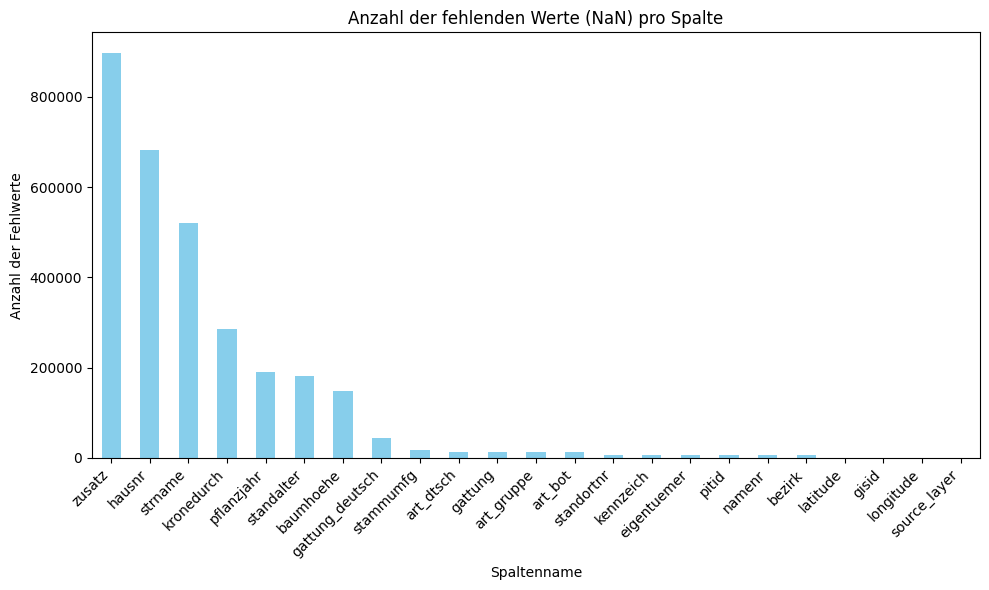

zusatz             898236
hausnr             683515
strname            521637
kronedurch         286127
pflanzjahr         189458
standalter         182758
baumhoehe          148829
gattung_deutsch     45295
stammumfg           17805
art_dtsch           13500
gattung             13500
art_gruppe          13500
art_bot             13497
standortnr           7012
kennzeich            7006
eigentuemer          7006
pitid                7006
namenr               7006
bezirk               7006
latitude                0
gisid                   0
longitude               0
source_layer            0
dtype: int64


In [5]:
plt.figure(figsize=(10, 6))
df.isna().sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')

plt.title('Anzahl der fehlenden Werte (NaN) pro Spalte')
plt.xlabel('Spaltenname')
plt.ylabel('Anzahl der Fehlwerte')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

print(df.isna().sum().sort_values(ascending=False))

# Doppelte Werte

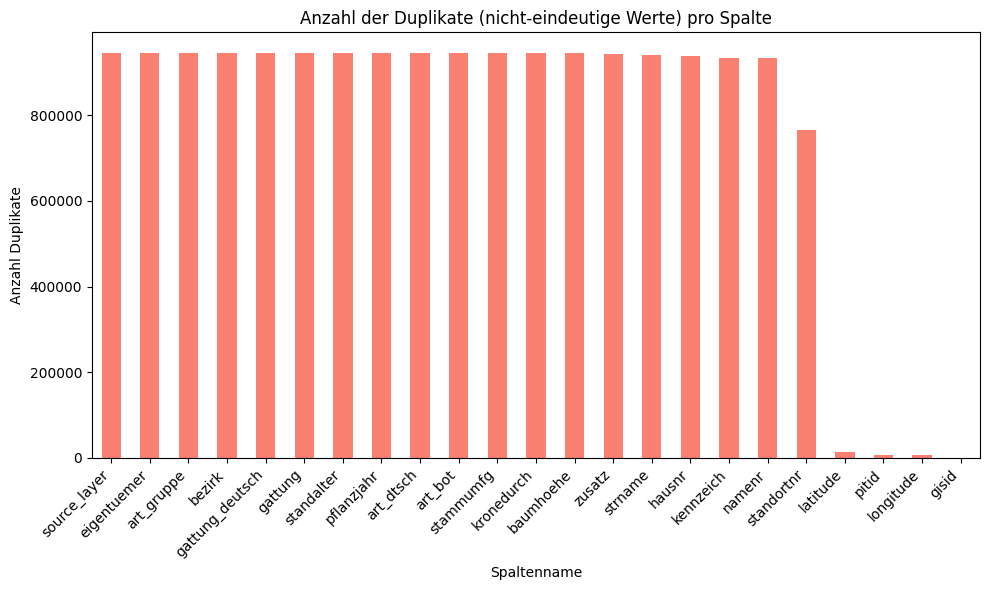

Gesamtzahl komplett identischer Zeilen: 0

Duplikate pro Spalte:
source_layer       945905
eigentuemer        945905
art_gruppe         945901
bezirk             945894
gattung_deutsch    945810
gattung            945801
standalter         945610
pflanzjahr         945605
art_dtsch          945053
art_bot            945003
stammumfg          944941
kronedurch         944622
baumhoehe          944459
zusatz             943405
strname            939401
hausnr             937992
kennzeich          933608
namenr             933234
standortnr         765219
latitude            12929
pitid                7005
longitude            6019
gisid                   0
dtype: int64


In [6]:
total_duplicates = df.duplicated().sum()

duplicate_counts = {col: df[col].duplicated().sum() for col in df.columns}
dup_series = pd.Series(duplicate_counts).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
dup_series.plot(kind='bar', color='salmon')

plt.title('Anzahl der Duplikate (nicht-eindeutige Werte) pro Spalte')
plt.xlabel('Spaltenname')
plt.ylabel('Anzahl Duplikate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

print(f"Gesamtzahl komplett identischer Zeilen: {total_duplicates}")
print("\nDuplikate pro Spalte:")
print(dup_series)

In [7]:
df.describe()

,standalter,kronedurch,stammumfg,baumhoehe,longitude,latitude
count,763149.000000,659780.000000,928102.000000,797078.000000,945907.000000,9.459070e+05
mean,46.549486,6.880715,116.972545,13.630248,390795.820369,5.819007e+06
std,27.604051,4.302993,74.123946,6.292175,8581.150015,6.636832e+03
min,0.000000,0.000000,0.000000,0.000000,370189.475800,5.799847e+06
25%,27.000000,4.000000,66.000000,9.000000,384488.992950,5.813380e+06
50%,42.000000,6.000000,104.000000,13.790000,390497.857200,5.819530e+06
75%,62.000000,9.000000,154.000000,18.000000,397555.600950,5.823558e+06
max,861.000000,30.000000,1968.000000,45.000000,415496.892000,5.835820e+06


# Datenbereinigung

## IDs entfernen

In [8]:
columns_to_remove = [
    "pitid",
    "gisid"]

df = df.drop(columns_to_remove, axis=1)

df.head()

,standortnr,kennzeich,namenr,art_dtsch,art_bot,gattung_deutsch,gattung,art_gruppe,strname,hausnr,...,pflanzjahr,standalter,kronedurch,stammumfg,baumhoehe,eigentuemer,bezirk,longitude,latitude,source_layer
0,93,01414,Fritz-Reuter-Allee,Pyramiden-Hainbuche,Carpinus betulus 'Fastigiata',HAINBUCHE,CARPINUS,Laubbäume,Fritz-Reuter-Allee,gü.111/113,...,1975,50.0,NaN,109.0,15.0,Land Berlin,Neukölln,394532.2558,5.811461e+06,baumbestand:strassenbaeume
1,91,01414,Fritz-Reuter-Allee,"Berg-Ahorn, Weiss-Ahorn",Acer pseudoplatanus,AHORN,ACER,Laubbäume,Fritz-Reuter-Allee,gü.111,...,1975,50.0,NaN,382.0,NaN,Land Berlin,Neukölln,394541.9243,5.811473e+06,baumbestand:strassenbaeume
2,90,01414,Fritz-Reuter-Allee,"Berg-Ahorn, Weiss-Ahorn",Acer pseudoplatanus,AHORN,ACER,Laubbäume,Fritz-Reuter-Allee,gü.109,...,1980,45.0,NaN,98.0,14.0,Land Berlin,Neukölln,394548.0615,5.811479e+06,baumbestand:strassenbaeume
3,89,01414,Fritz-Reuter-Allee,"Berg-Ahorn, Weiss-Ahorn",Acer pseudoplatanus,AHORN,ACER,Laubbäume,Fritz-Reuter-Allee,gü.105,...,1935,90.0,NaN,189.0,15.0,Land Berlin,Neukölln,394556.6587,5.811496e+06,baumbestand:strassenbaeume
4,88,01414,Fritz-Reuter-Allee,"Berg-Ahorn, Weiss-Ahorn",Acer pseudoplatanus,AHORN,ACER,Laubbäume,Fritz-Reuter-Allee,gü.103,...,1975,50.0,NaN,145.0,15.0,Land Berlin,Neukölln,394570.1601,5.811516e+06,baumbestand:strassenbaeume


## Ausreißer / "Falsche" Werte entfernen

### Art

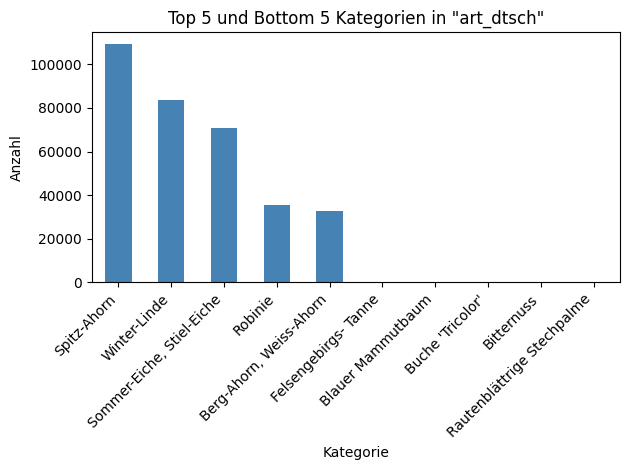

In [9]:
top_5_art_dtsch = df["art_dtsch"].value_counts().head(5)
bottom_5_art_dtsch = df["art_dtsch"].value_counts().tail(5)

top_and_bottom_5 = pd.concat([top_5_art_dtsch, bottom_5_art_dtsch]).sort_values(ascending=False)

top_and_bottom_5.plot(kind='bar', color=['steelblue']*5 + ['salmon']*5)
plt.title('Top 5 und Bottom 5 Kategorien in "art_dtsch"')
plt.xlabel('Kategorie')
plt.ylabel('Anzahl')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

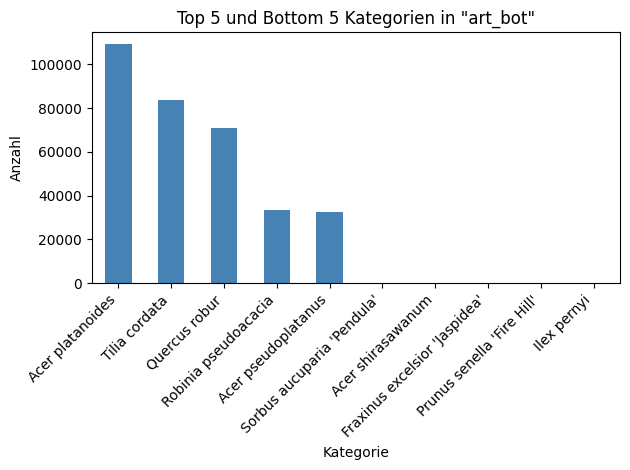

In [10]:
top_5_art_dtsch = df["art_bot"].value_counts().head(5)
bottom_5_art_dtsch = df["art_bot"].value_counts().tail(5)

top_and_bottom_5 = pd.concat([top_5_art_dtsch, bottom_5_art_dtsch]).sort_values(ascending=False)

top_and_bottom_5.plot(kind='bar', color=['steelblue']*5 + ['salmon']*5)
plt.title('Top 5 und Bottom 5 Kategorien in "art_bot"')
plt.xlabel('Kategorie')
plt.ylabel('Anzahl')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

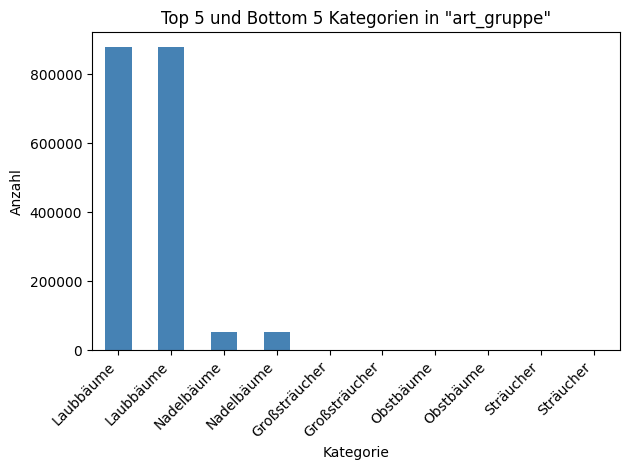

In [11]:
top_5_art_dtsch = df["art_gruppe"].value_counts().head(5)
bottom_5_art_dtsch = df["art_gruppe"].value_counts().tail(5)

top_and_bottom_5 = pd.concat([top_5_art_dtsch, bottom_5_art_dtsch]).sort_values(ascending=False)

top_and_bottom_5.plot(kind='bar', color=['steelblue']*5 + ['salmon']*5)
plt.title('Top 5 und Bottom 5 Kategorien in "art_gruppe"')
plt.xlabel('Kategorie')
plt.ylabel('Anzahl')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [12]:
df["art_dtsch"].isna().sum()

np.int64(13500)

In [13]:
df["art_bot"].isna().sum()

np.int64(13497)

In [14]:
df["art_gruppe"].isna().sum()

np.int64(13500)

In [15]:
df[df["art_dtsch"].isna() & df["art_bot"].isna()]

,standortnr,kennzeich,namenr,art_dtsch,art_bot,gattung_deutsch,gattung,art_gruppe,strname,hausnr,...,pflanzjahr,standalter,kronedurch,stammumfg,baumhoehe,eigentuemer,bezirk,longitude,latitude,source_layer
384112,DA,17676,HAUPTSTR.,None,None,None,None,None,Hauptstraße,None,...,None,NaN,NaN,NaN,NaN,Land Berlin,Tempelhof-Schöneberg,388116.4302,5.816165e+06,baumbestand:strassenbaeume
388707,DL,02628,KÜSTRINER STR.,None,None,None,None,None,Küstriner Straße,None,...,None,0.0,NaN,NaN,NaN,Land Berlin,Tempelhof-Schöneberg,392044.6278,5.807663e+06,baumbestand:strassenbaeume
399179,None,19165,WILHELM-KABUS-STR.,None,None,None,None,None,Wilhelm-Kabus-Straße,None,...,None,NaN,NaN,NaN,NaN,Land Berlin,Tempelhof-Schöneberg,388928.3050,5.815525e+06,baumbestand:strassenbaeume
419181,None,03196-Str,Nennhauser Damm,None,None,None,None,None,Nennhauser Damm,None,...,None,NaN,NaN,NaN,NaN,Land Berlin,Spandau,372916.4733,5.821514e+06,baumbestand:strassenbaeume
431897,7,00384,Max-Beckmann-Oberschule (3. Sek),None,None,None,None,None,Auguste-Viktoria-Allee,None,...,None,NaN,0.0,0.0,0.0,Land Berlin,Reinickendorf,385848.1300,5.826030e+06,baumbestand:strassenbaeume
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945902,None,None,None,None,None,None,None,None,None,None,...,None,NaN,NaN,NaN,NaN,None,None,389770.8601,5.830349e+06,baumbestand:anlagenbaeume
945903,None,None,None,None,None,None,None,None,None,None,...,None,NaN,NaN,NaN,NaN,None,None,389749.6945,5.830456e+06,baumbestand:anlagenbaeume
945904,None,None,None,None,None,None,None,None,None,None,...,None,NaN,NaN,NaN,NaN,None,None,380126.0825,5.831643e+06,baumbestand:anlagenbaeume
945905,None,None,None,None,None,None,None,None,None,None,...,None,NaN,NaN,NaN,NaN,None,None,380134.9333,5.831657e+06,baumbestand:anlagenbaeume


In [16]:
df = df.dropna(subset=['art_dtsch', 'art_bot'])

### Gattung

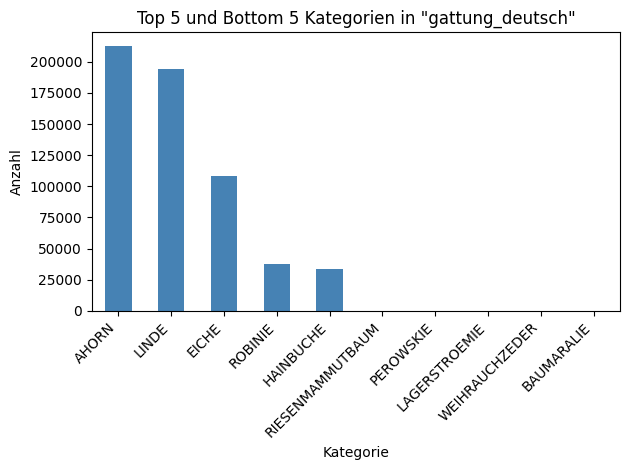

In [17]:
top_5_art_dtsch = df["gattung_deutsch"].value_counts().head(5)
bottom_5_art_dtsch = df["gattung_deutsch"].value_counts().tail(5)

top_and_bottom_5 = pd.concat([top_5_art_dtsch, bottom_5_art_dtsch]).sort_values(ascending=False)

top_and_bottom_5.plot(kind='bar', color=['steelblue']*5 + ['salmon']*5)
plt.title('Top 5 und Bottom 5 Kategorien in "gattung_deutsch"')
plt.xlabel('Kategorie')
plt.ylabel('Anzahl')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

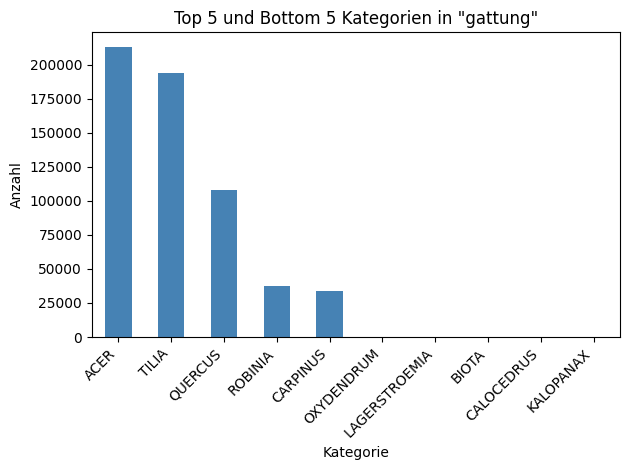

In [18]:
top_5_art_dtsch = df["gattung"].value_counts().head(5)
bottom_5_art_dtsch = df["gattung"].value_counts().tail(5)

top_and_bottom_5 = pd.concat([top_5_art_dtsch, bottom_5_art_dtsch]).sort_values(ascending=False)

top_and_bottom_5.plot(kind='bar', color=['steelblue']*5 + ['salmon']*5)
plt.title('Top 5 und Bottom 5 Kategorien in "gattung"')
plt.xlabel('Kategorie')
plt.ylabel('Anzahl')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [19]:
df["gattung_deutsch"].isna().sum()

np.int64(31795)

In [20]:
df["gattung"].isna().sum()

np.int64(0)

In [21]:
df[df["gattung_deutsch"].isna() & df["gattung"].notna()]

,standortnr,kennzeich,namenr,art_dtsch,art_bot,gattung_deutsch,gattung,art_gruppe,strname,hausnr,...,pflanzjahr,standalter,kronedurch,stammumfg,baumhoehe,eigentuemer,bezirk,longitude,latitude,source_layer
32,1,05474,Fritzi-Massary-Straße,Japanischer Schnurbaum,Sophora japonica,None,SOPHORA,Laubbäume,Fritzi-Massary-Straße,0,...,2000,25.0,NaN,81.0,12.0,Land Berlin,Neukölln,396207.2744,5.813491e+06,baumbestand:strassenbaeume
58,2,05474,Fritzi-Massary-Straße,Japanischer Schnurbaum,Sophora japonica,None,SOPHORA,Laubbäume,Fritzi-Massary-Straße,0,...,2000,25.0,NaN,93.0,13.0,Land Berlin,Neukölln,396201.6652,5.813495e+06,baumbestand:strassenbaeume
316,8,01355,Franz-Körner-Straße,Japanischer Schnurbaum,Sophora japonica,None,SOPHORA,Laubbäume,Franz-Körner-Straße,30,...,1980,45.0,NaN,184.0,16.0,Land Berlin,Neukölln,394383.4641,5.813006e+06,baumbestand:strassenbaeume
317,7,01355,Franz-Körner-Straße,Japanischer Schnurbaum,Sophora japonica,None,SOPHORA,Laubbäume,Franz-Körner-Straße,28,...,1985,40.0,NaN,171.0,16.0,Land Berlin,Neukölln,394390.5919,5.813007e+06,baumbestand:strassenbaeume
461,10,01281,Finowstraße,Japanischer Schnurbaum,Sophora japonica,None,SOPHORA,Laubbäume,Finowstraße,8,...,2010,15.0,NaN,63.0,10.0,Land Berlin,Neukölln,394259.8500,5.815800e+06,baumbestand:strassenbaeume
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940907,F/0740,01179,Klötzbecken bis Zabel-Krüger-Damm,Unbekannt,Unbekannt,None,UNBEKANNT,Laubbäume,None,None,...,None,NaN,NaN,NaN,NaN,Land Berlin,Reinickendorf,387844.9005,5.830207e+06,baumbestand:anlagenbaeume
940908,F/0745,01179,Klötzbecken bis Zabel-Krüger-Damm,Unbekannt,Unbekannt,None,UNBEKANNT,Laubbäume,None,None,...,None,NaN,NaN,NaN,NaN,Land Berlin,Reinickendorf,387847.1494,5.830206e+06,baumbestand:anlagenbaeume
940909,F/0260,01179,Klötzbecken bis Zabel-Krüger-Damm,Unbekannt,Unbekannt,None,UNBEKANNT,Laubbäume,None,None,...,None,NaN,NaN,NaN,NaN,Land Berlin,Reinickendorf,388015.9354,5.830129e+06,baumbestand:anlagenbaeume
940910,F/0265,01179,Klötzbecken bis Zabel-Krüger-Damm,Unbekannt,Unbekannt,None,UNBEKANNT,Laubbäume,None,None,...,None,NaN,NaN,NaN,NaN,Land Berlin,Reinickendorf,388016.8614,5.830130e+06,baumbestand:anlagenbaeume


Hier alle "gattung_deutsch" mit Nan ersetzten aus der Spalte "Gattung" aber dann ins deutsche übersetzen

In [22]:
df[df["gattung_deutsch"].isna() & df["gattung"].notna()]["gattung"].value_counts().index.to_list()

['PRUNUS',
 'UNBEKANNT',
 'SOPHORA',
 'CUPRESSOCYPARIS',
 'SEQUOIADENDRON',
 'TOONA',
 'CEPHALOTAXUS',
 'STAPHYLEA']

In [23]:
translation_dict = {
    'PRUNUS' : 'Steinobstgewächse',
    'UNBEKANNT': 'Unbekannt',
    'SOPHORA' : 'Schnurbaum',
    'CUPRESSOCYPARIS' : 'Bastardzypresse',
    'SEQUOIADENDRON': 'Riesenmammutbäume',
    'TOONA' : 'Surenbaum',
    'CEPHALOTAXUS' : 'Kopfeiben',
    'STAPHYLEA' : 'Pimpernüsse'}

df.loc[df['gattung_deutsch'].isna(), 'gattung_deutsch'] = df['gattung']

df['gattung_deutsch'] = df['gattung_deutsch'].replace(translation_dict)

In [24]:
df["gattung_deutsch"].isna().sum()

np.int64(0)

### Pflanzjahr & Standalter

In [25]:
df["pflanzjahr"] = pd.to_numeric(df["pflanzjahr"], errors='coerce')

In [26]:
df[["pflanzjahr", "standalter"]].describe()

,pflanzjahr,standalter
count,756441.000000,763140.000000
mean,1978.030874,46.549916
std,27.578905,27.603902
min,32.000000,0.000000
25%,1963.000000,27.000000
50%,1982.000000,42.000000
75%,1997.000000,62.000000
max,2025.000000,861.000000


<Axes: >

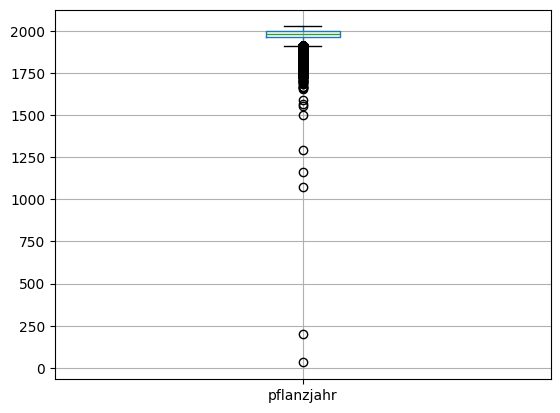

In [27]:
df.boxplot(column="pflanzjahr")

<Axes: >

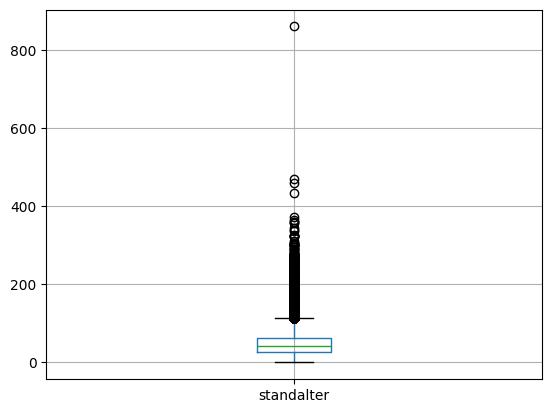

In [28]:
df.boxplot(column="standalter")

In [29]:
df[["pflanzjahr", "standalter"]].sample(3)

,pflanzjahr,standalter
137541,1977.0,48.0
52916,2006.0,19.0
41804,1986.0,39.0


Der Wert "standalter" sind sauberer aus und wird als Maß genommen

In [30]:
df[((2025 - df["pflanzjahr"] != df["standalter"]))][["pflanzjahr", "standalter"]]

,pflanzjahr,standalter
6064,1994.0,30.0
25641,32.0,0.0
52031,1990.0,27.0
81250,1950.0,74.0
149245,1961.0,58.0
...,...,...
940970,NaN,NaN
940971,NaN,NaN
940973,NaN,0.0
940985,NaN,0.0


In [31]:
# Wir füllen nur dort auf, wo Standalter NaN ist, aber ein Pflanzjahr existiert
df['standalter'] = df['standalter'].fillna(2025 - df['pflanzjahr'])

# Pflanzjahr basierend auf Standalter (neu) berechnen
df['pflanzjahr'] = 2025 - df['standalter']

In [32]:
df[((2025 - df["pflanzjahr"] != df["standalter"]))][["pflanzjahr", "standalter"]]

,pflanzjahr,standalter
277759,NaN,NaN
279781,NaN,NaN
281294,NaN,NaN
377345,NaN,NaN
400275,NaN,NaN
...,...,...
940908,NaN,NaN
940909,NaN,NaN
940910,NaN,NaN
940970,NaN,NaN


<Axes: >

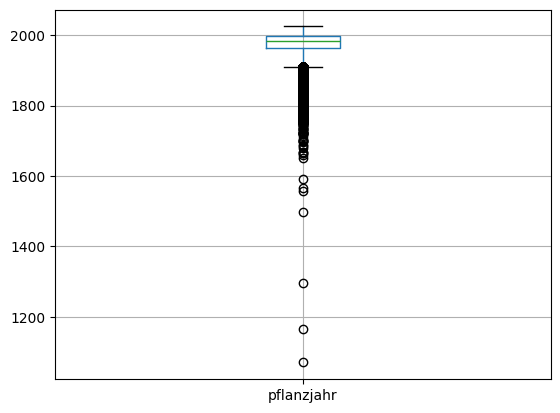

In [33]:
df.boxplot(column="pflanzjahr")

<Axes: >

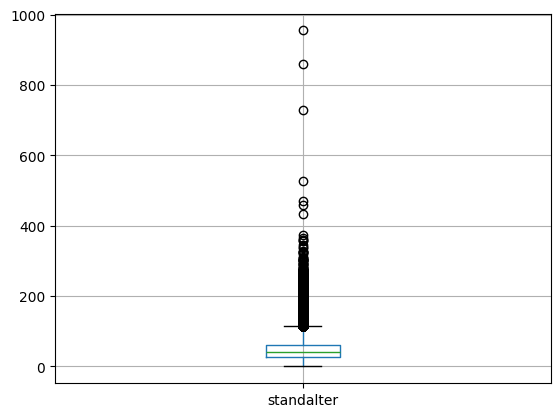

In [34]:
df.boxplot(column="standalter")

In [35]:
df[["pflanzjahr", "standalter"]].describe()

,pflanzjahr,standalter
count,763143.000000,763143.000000
mean,1978.447368,46.552632
std,27.639979,27.639979
min,1070.000000,0.000000
25%,1963.000000,27.000000
50%,1983.000000,42.000000
75%,1998.000000,62.000000
max,2025.000000,955.000000


### Kronendurchschnitt & Stammunfang & Baumhöhe

In [36]:
cols = ["kronedurch", "stammumfg", "baumhoehe"]

for col in cols:
    df.loc[df[col] == 0, col] = np.nan

<Axes: >

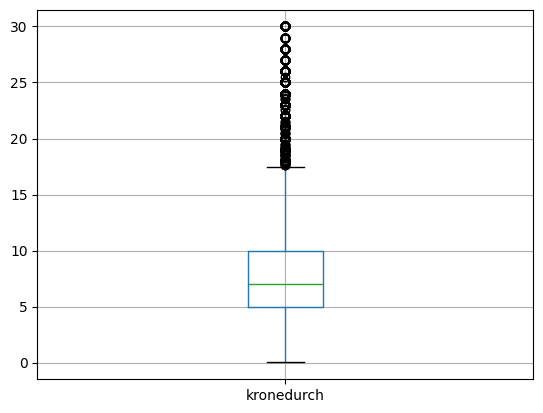

In [37]:
df.boxplot(column="kronedurch")

<Axes: >

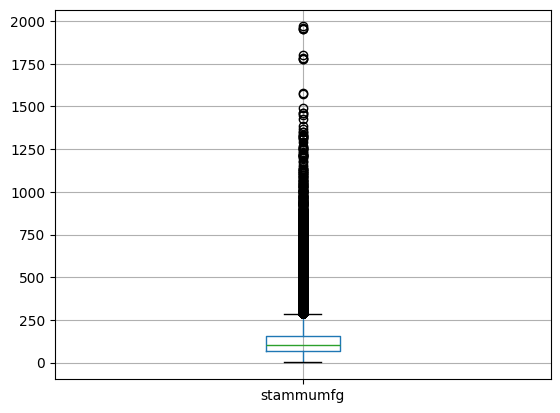

In [38]:
df.boxplot(column="stammumfg")

<Axes: >

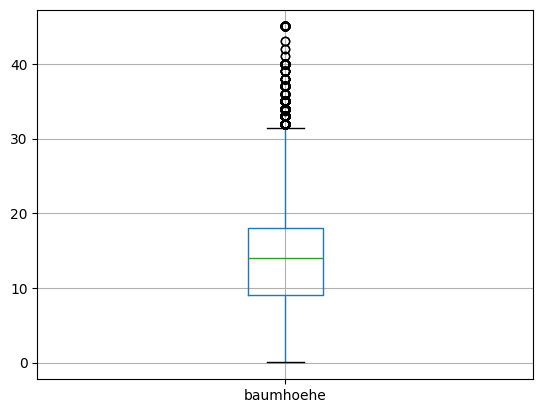

In [39]:
df.boxplot(column="baumhoehe")

## Fehlender Werte ergänzen mit Median je Baumart

In [40]:
columns_to_fix = [
    "pflanzjahr",
    "standalter",
    "kronedurch",
    "stammumfg",
    "baumhoehe",
]

for col in columns_to_fix:
    # 1. Berechne den Median für jede Baumart ('art_dtsch')
    # 2. Nutze transform, um den Median auf die Zeilenlänge des DFs zu bringen
    # 3. Fülle nur die NaNs in der Originalspalte auf
    df[col] = df[col].fillna(df.groupby("art_dtsch")[col].transform("median"))

# Optionaler Sicherheitscheck:
# Falls eine Baumart so selten ist, dass sie GAR KEINE Werte in einer Spalte hat,
# bleibt der Median NaN. Diese restlichen Fälle füllen wir mit dem Gesamt-Median:
for col in columns_to_fix:
    df[col] = df[col].fillna(df[col].median())

In [41]:
df[columns_to_fix].isna().sum()

pflanzjahr    0
standalter    0
kronedurch    0
stammumfg     0
baumhoehe     0
dtype: int64

In [42]:
df[columns_to_fix].describe()

,pflanzjahr,standalter,kronedurch,stammumfg,baumhoehe
count,932407.000000,932407.000000,932407.000000,932407.000000,932407.000000
mean,1979.283003,45.716997,7.277157,117.937463,13.847605
std,25.509258,25.509258,3.419399,73.054901,5.734366
min,1070.000000,0.000000,0.010000,1.000000,0.020000
25%,1967.000000,30.000000,5.000000,66.000000,10.000000
50%,1982.000000,43.000000,7.000000,104.000000,14.000000
75%,1995.000000,58.000000,9.000000,154.000000,17.000000
max,2025.000000,955.000000,30.000000,1968.000000,45.000000


## Bäume außerhalb Berlin entfernen

In [43]:
# Grenzen für Berlin in EPSG:25833 (UTM Zone 33N)
lon_min, lon_max = 360000, 420000  # Easting in Metern
lat_min, lat_max = 5800000, 5840000 # Northing in Metern

# Filterung der Bäume, die außerhalb dieser Meter-Werte liegen (Berlin)
outside_berlin = df[
    (df['latitude'] < lat_min) | (df['latitude'] > lat_max) |
    (df['longitude'] < lon_min) | (df['longitude'] > lon_max)
].copy()

In [44]:
outside_berlin.head()

,standortnr,kennzeich,namenr,art_dtsch,art_bot,gattung_deutsch,gattung,art_gruppe,strname,hausnr,...,pflanzjahr,standalter,kronedurch,stammumfg,baumhoehe,eigentuemer,bezirk,longitude,latitude,source_layer
327288,5,150104,Ebelallee Sch,Schwarz-Erle,Alnus glutinosa,ERLE,ALNUS,Laubbäume,Ebelallee,None,...,1956.0,69.0,6.0,175.0,21.0,Land Berlin,Treptow-Köpenick,407711.5541,5.799947e+06,baumbestand:strassenbaeume
327289,4,150104,Ebelallee Sch,Schwarz-Erle,Alnus glutinosa,ERLE,ALNUS,Laubbäume,Ebelallee,None,...,1913.0,112.0,6.0,341.0,21.0,Land Berlin,Treptow-Köpenick,407717.5058,5.799948e+06,baumbestand:strassenbaeume
327290,3,150104,Ebelallee Sch,Sand-Birke,Betula pendula,BIRKE,BETULA,Laubbäume,Ebelallee,None,...,1963.0,62.0,3.0,103.0,18.0,Land Berlin,Treptow-Köpenick,407801.8484,5.799949e+06,baumbestand:strassenbaeume
327293,7,150104,Ebelallee Sch,Ulme,Ulmus spec.,ULME,ULMUS,Laubbäume,Ebelallee,None,...,1929.0,96.0,9.0,255.0,25.0,Land Berlin,Treptow-Köpenick,407715.4990,5.799953e+06,baumbestand:strassenbaeume
327294,1,150104,Ebelallee Sch,Sand-Birke,Betula pendula,BIRKE,BETULA,Laubbäume,Ebelallee,None,...,1953.0,72.0,5.0,150.0,21.0,Land Berlin,Treptow-Köpenick,407806.0433,5.799949e+06,baumbestand:strassenbaeume


In [45]:
# Transformer erstellen: Von UTM (EPSG:25833) zu WGS84 (EPSG:4326)
transformer = Transformer.from_crs("epsg:25833", "epsg:4326", always_xy=True)

# Die Grenzen für das blaue Rechteck in WGS84 (Grad) definieren (Berlinder Grenzen)
lat_min_deg, lat_max_deg = 52.33, 52.68
lon_min_deg, lon_max_deg = 13.08, 13.77

m = folium.Map(location=[52.52, 13.40], zoom_start=9)

# blaue Rechteck hinzufügen ("Grenzen von Berlin")
folium.Rectangle(
    bounds=[[lat_min_deg, lon_min_deg], [lat_max_deg, lon_max_deg]],
    color='blue',
    fill=True,
    fill_opacity=0.1,
    popup='Berlin Bounding Box'
).add_to(m)

# Bäume hinzufügen und dabei Koordinaten umrechnen
for idx, row in outside_berlin.iterrows():
    lon_deg, lat_deg = transformer.transform(row['longitude'], row['latitude'])
    folium.CircleMarker(
        location=[lat_deg, lon_deg],
        radius=5,
        color='red',
        fill=True,
        popup=f"Art: {row['art_dtsch']}"
    ).add_to(m)

m

In [46]:
df.to_parquet(OUTPUT_DATA_PATH, index=False)